In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # for data Visualization
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
data.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [4]:
data.drop(['Status','unnamed1'],axis=1,inplace=True)
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [6]:
# delete all null values
data.dropna(inplace=True)

In [7]:
data.shape

(11239, 13)

In [8]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [9]:
# change the data type 
data['Amount']=data['Amount'].astype('int')
data['Amount'].dtype

dtype('int32')

In [10]:
data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [11]:
# data cleaning has been done till this point 

# Exploratory Data Analysis (EDA)

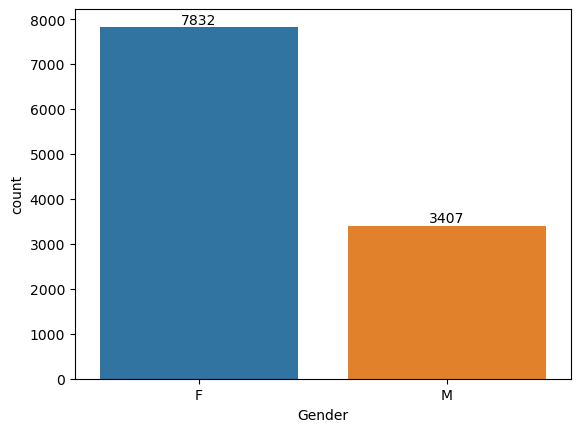

In [12]:
ax=sns.countplot(x='Gender',data=data)
for bars in ax.containers:
    ax.bar_label(bars)   

In [13]:
data[["Gender"]].describe()

,Gender
count,11239
unique,2
top,F
freq,7832


In [14]:
# total amount purchased by male and female
data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


In [15]:
female_Purchased = 74335853
male_purchased=31913276


In [16]:
total_purch= female_Purchased+ male_purchased
print(total_purch)

106249129


% bought by Female  69.96372930266563
------------------------------------------------------------------------------------------
% bought by male 30.036270697334377


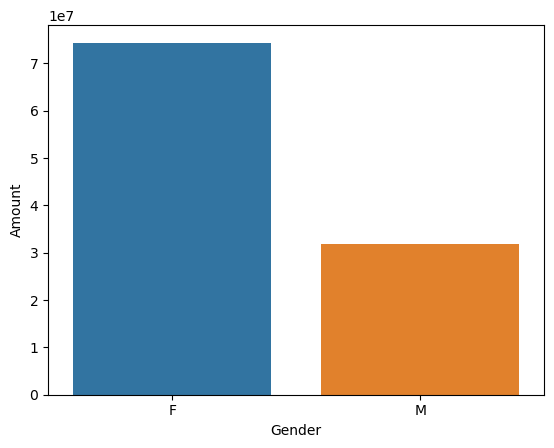

In [17]:
sales_gn=data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gn)

print('% bought by Female ',female_Purchased/total_purch*100)
print('-'*90)
print('% bought by male', male_purchased/total_purch*100)

From the above graph we understood that most of the buyers were female comparrision to male and the got the more purchasing power then males.

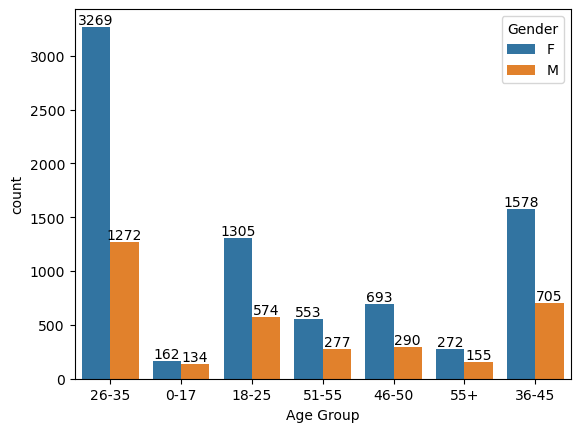

In [18]:
# Age group wise gender
ax=sns.countplot(data=data,x='Age Group', hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

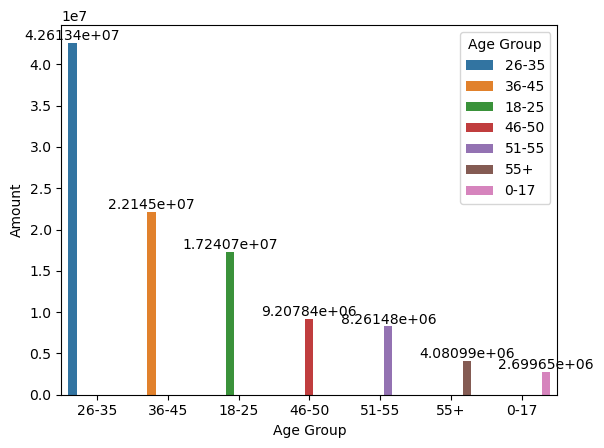

In [19]:
# Age group wise amount purchased
sales_age=data.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax= sns.barplot(data=sales_age,x='Age Group',y='Amount', hue='Age Group')

for bars in ax.containers:
    ax.bar_label(bars)

From the above graph we can see that most of the buyers are belong to age group 26-35.

In [20]:
# State
# totals no of orders from 10 states

In [21]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='count'>

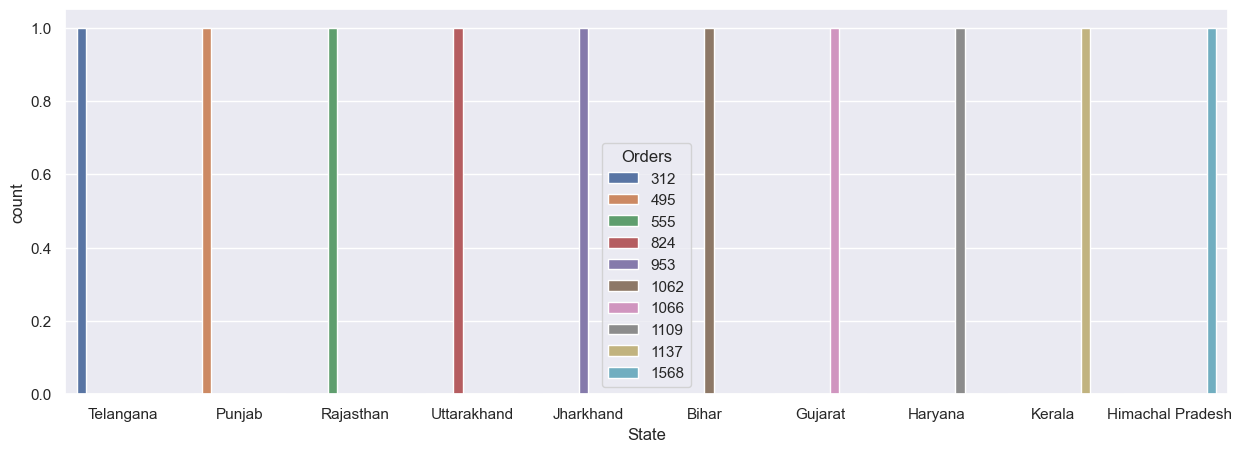

In [22]:
states_ord=data.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=True).head(10)
states_ord

sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(data=states_ord,x='State',hue='Orders')

<Axes: xlabel='State', ylabel='Orders'>

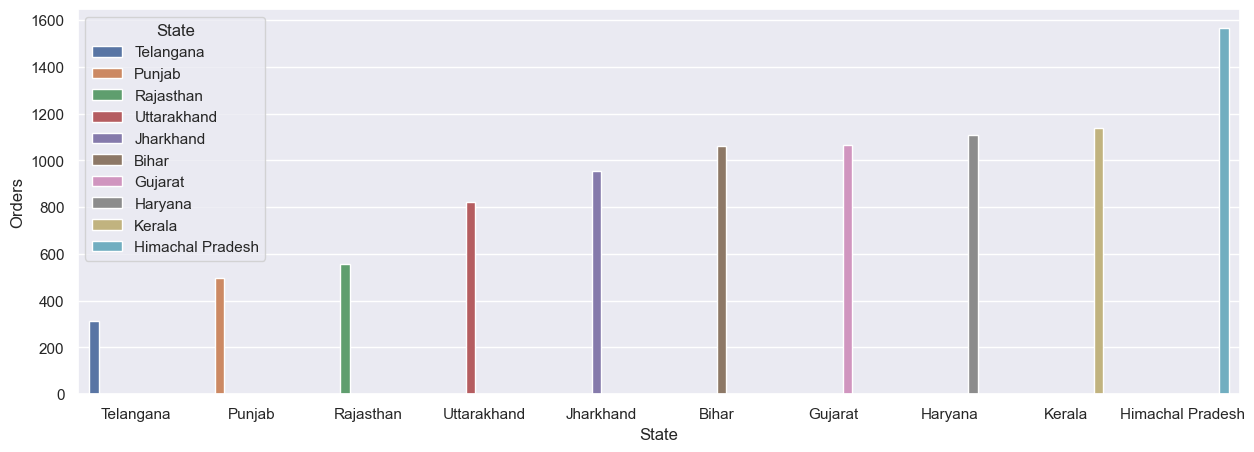

In [23]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=states_ord,x='State',y='Orders',hue='State')

<Axes: xlabel='State', ylabel='Amount'>

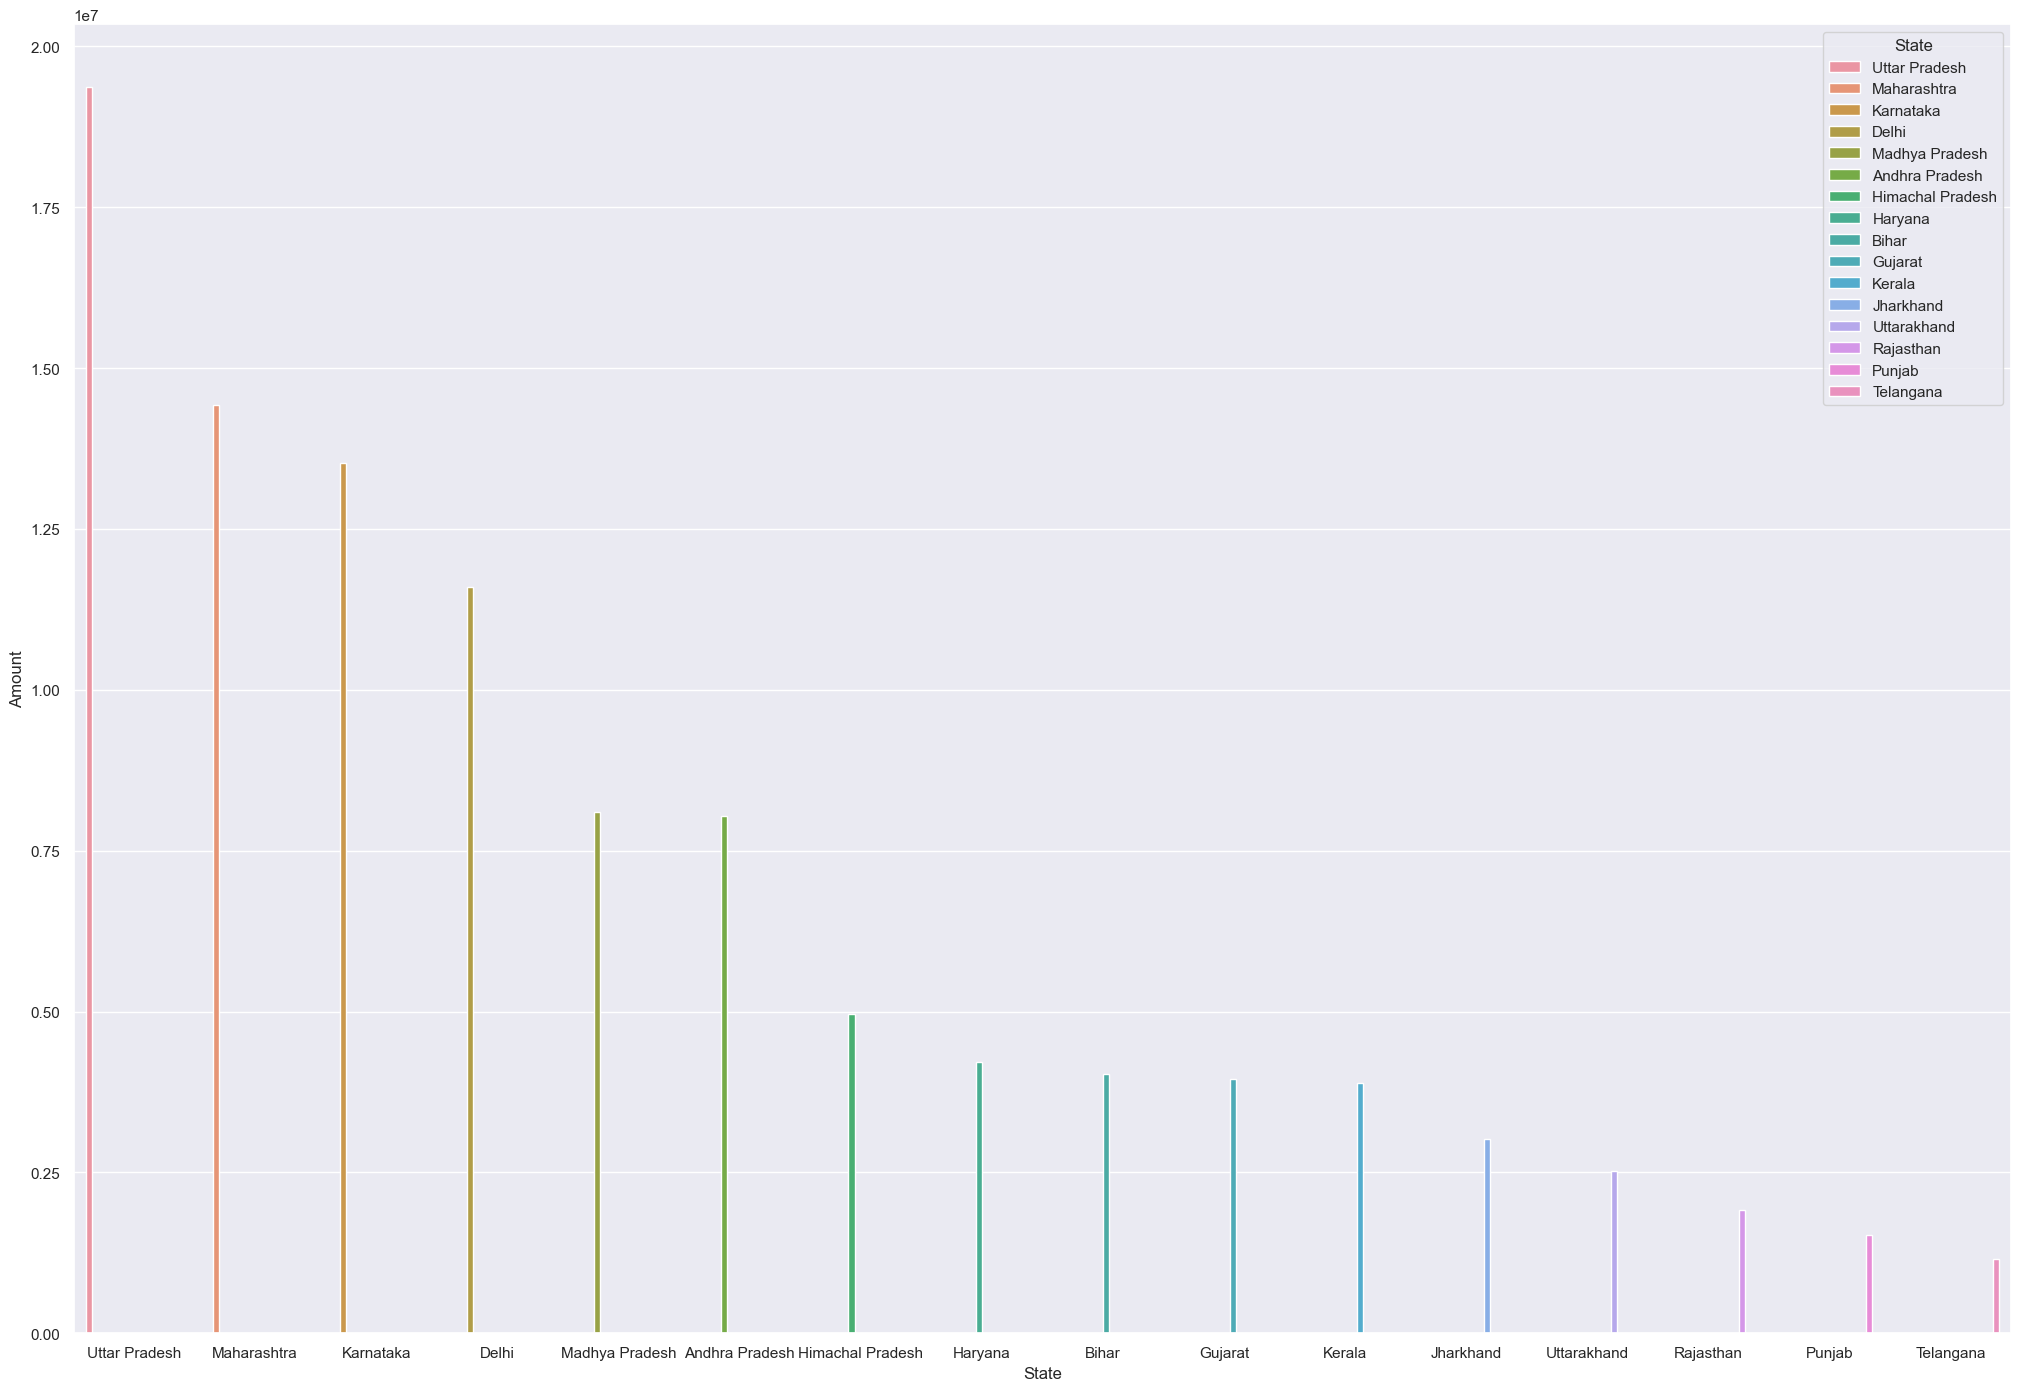

In [24]:
states_amt=data.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(25,17)})
sns.barplot(data=states_amt,x='State',y='Amount',hue='State')

<Axes: xlabel='State', ylabel='count'>

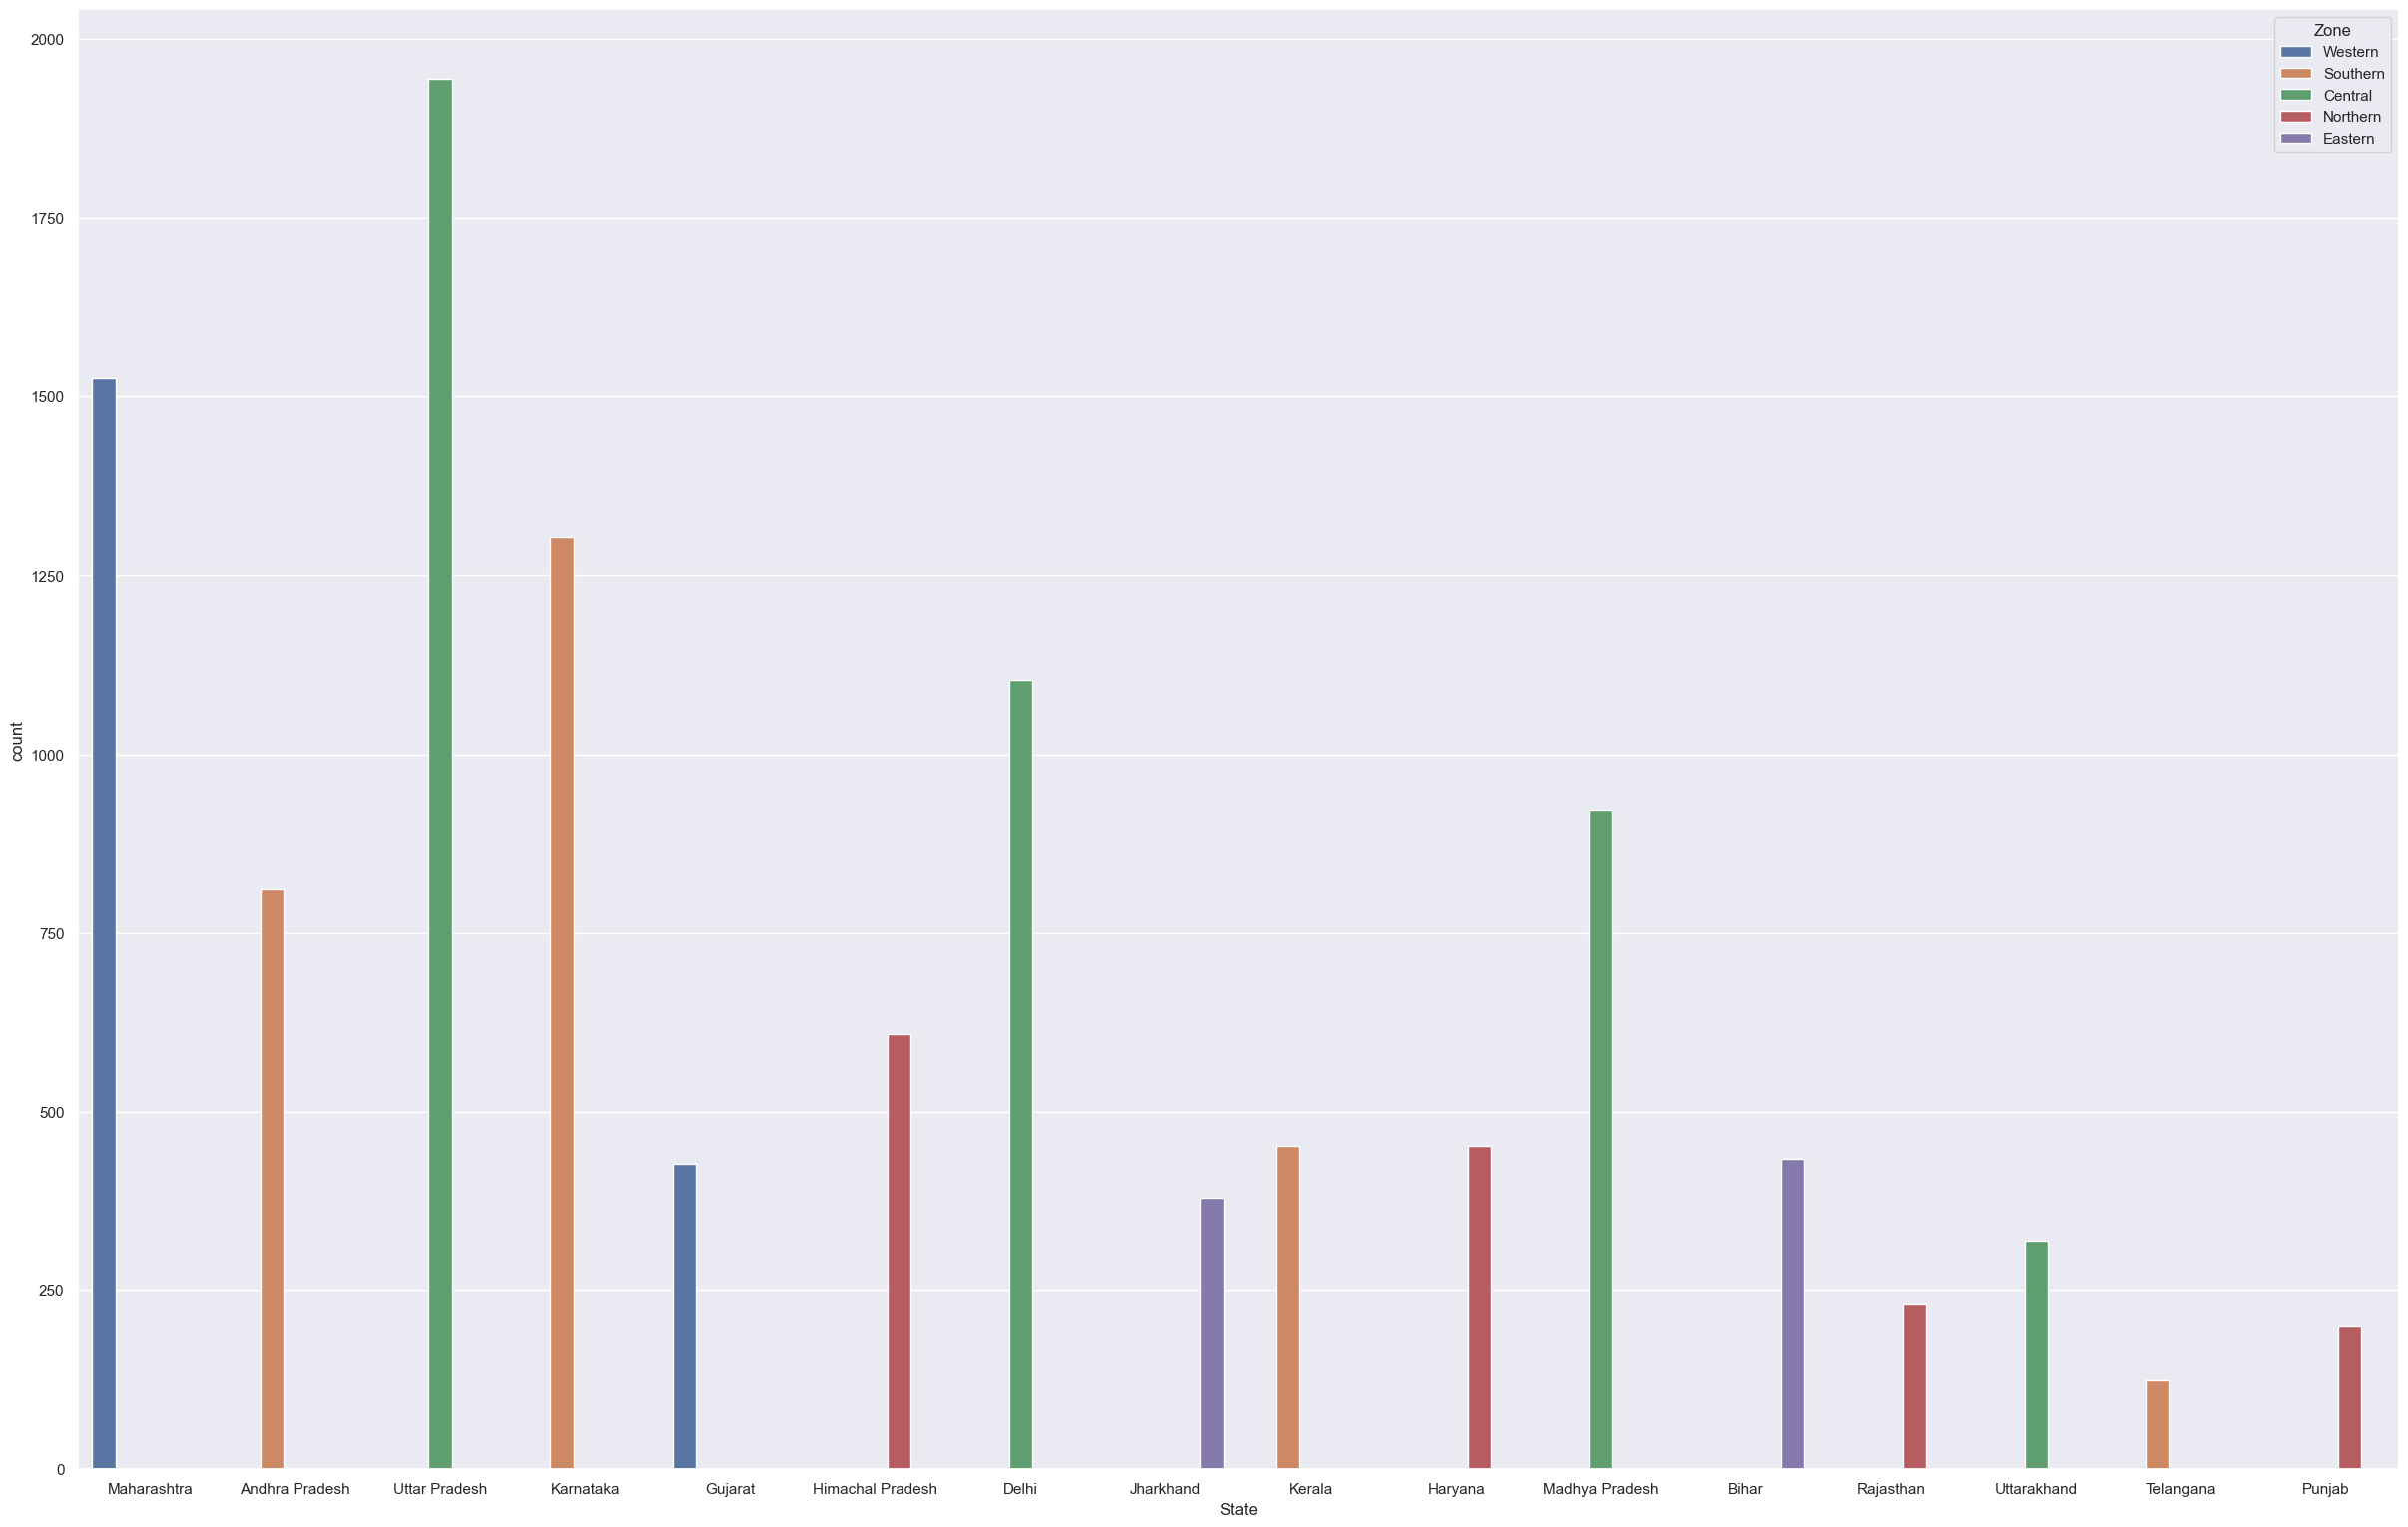

In [25]:
sns.set(rc={'figure.figsize':(30,19)})
sns.countplot(data=data,x='State',hue='Zone')

<Axes: xlabel='Zone', ylabel='Amount'>

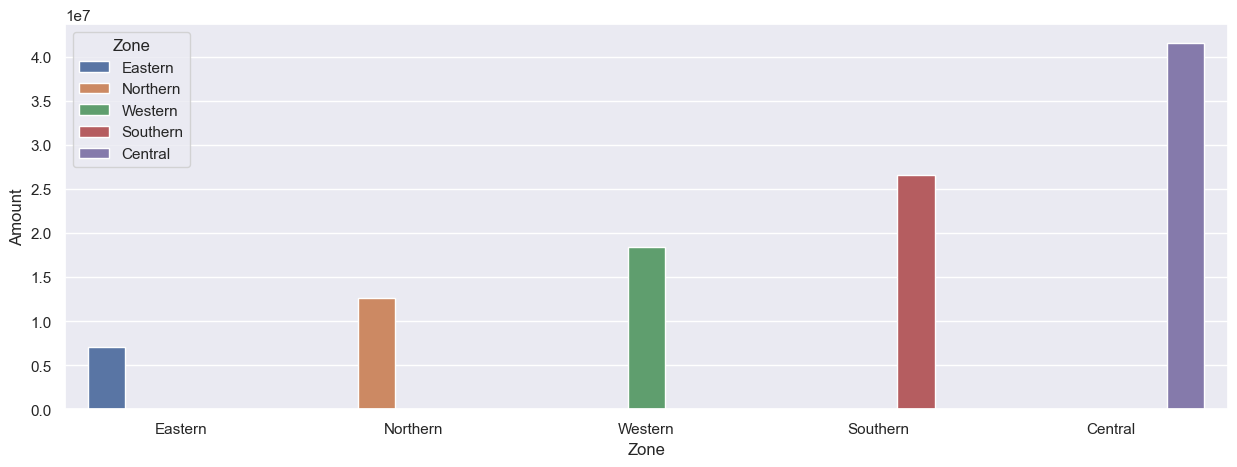

In [26]:
zone=data.groupby(['Zone'],as_index=False)['Amount'].sum().sort_values(by='Amount')

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=zone,x='Zone',y='Amount',hue='Zone')

 From above graphs we understood that most purchasing power state is UTTAR PRADESH and zone is CENTRAL

In [27]:
# Marital Status
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

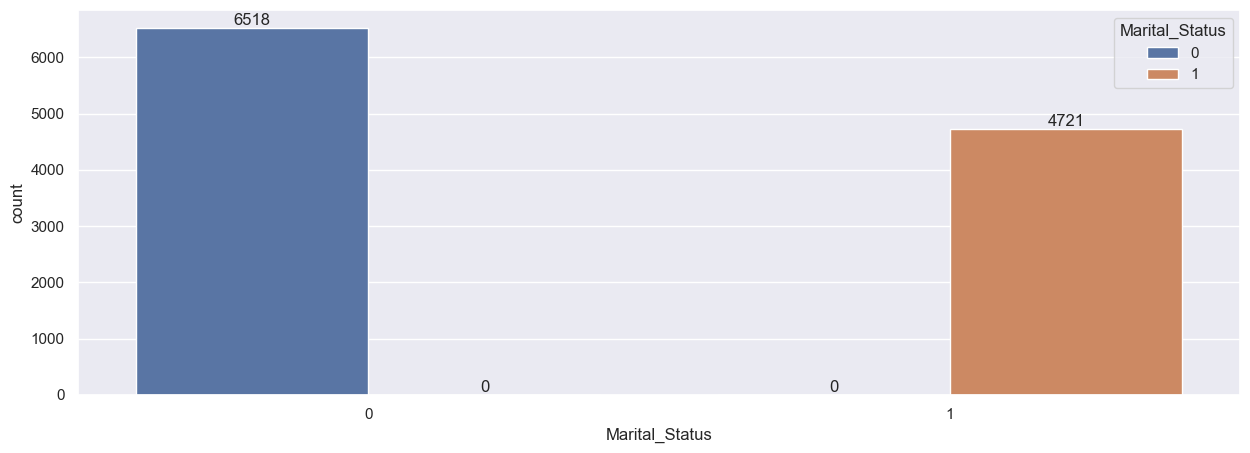

In [28]:
ax=sns.countplot(data=data,x='Marital_Status',hue='Marital_Status')

sns.set(rc={'figure.figsize':(8,8)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

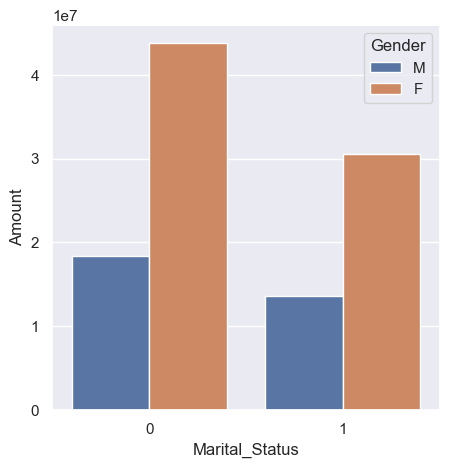

In [29]:
marr=data.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount')
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data=marr,x='Marital_Status',y='Amount',hue='Gender')

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

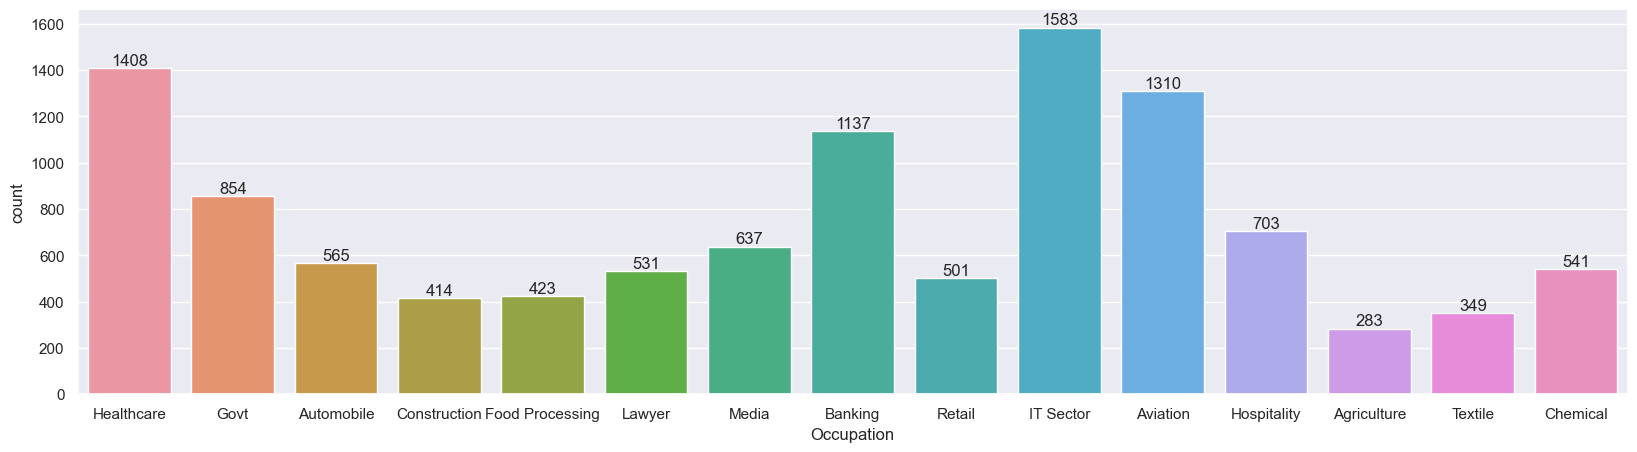

In [30]:
# Occupation
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = data, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

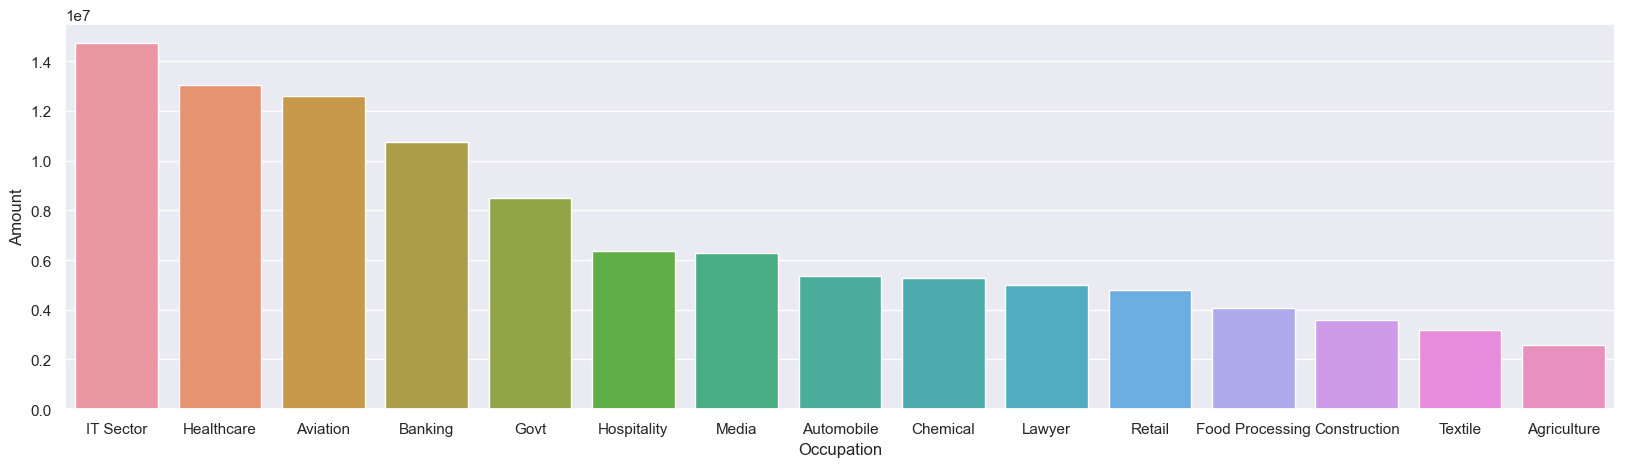

In [31]:
occ=data.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data=occ,x='Occupation',y='Amount')
sns.set(rc={'figure.figsize':(20,10)})

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

In [32]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

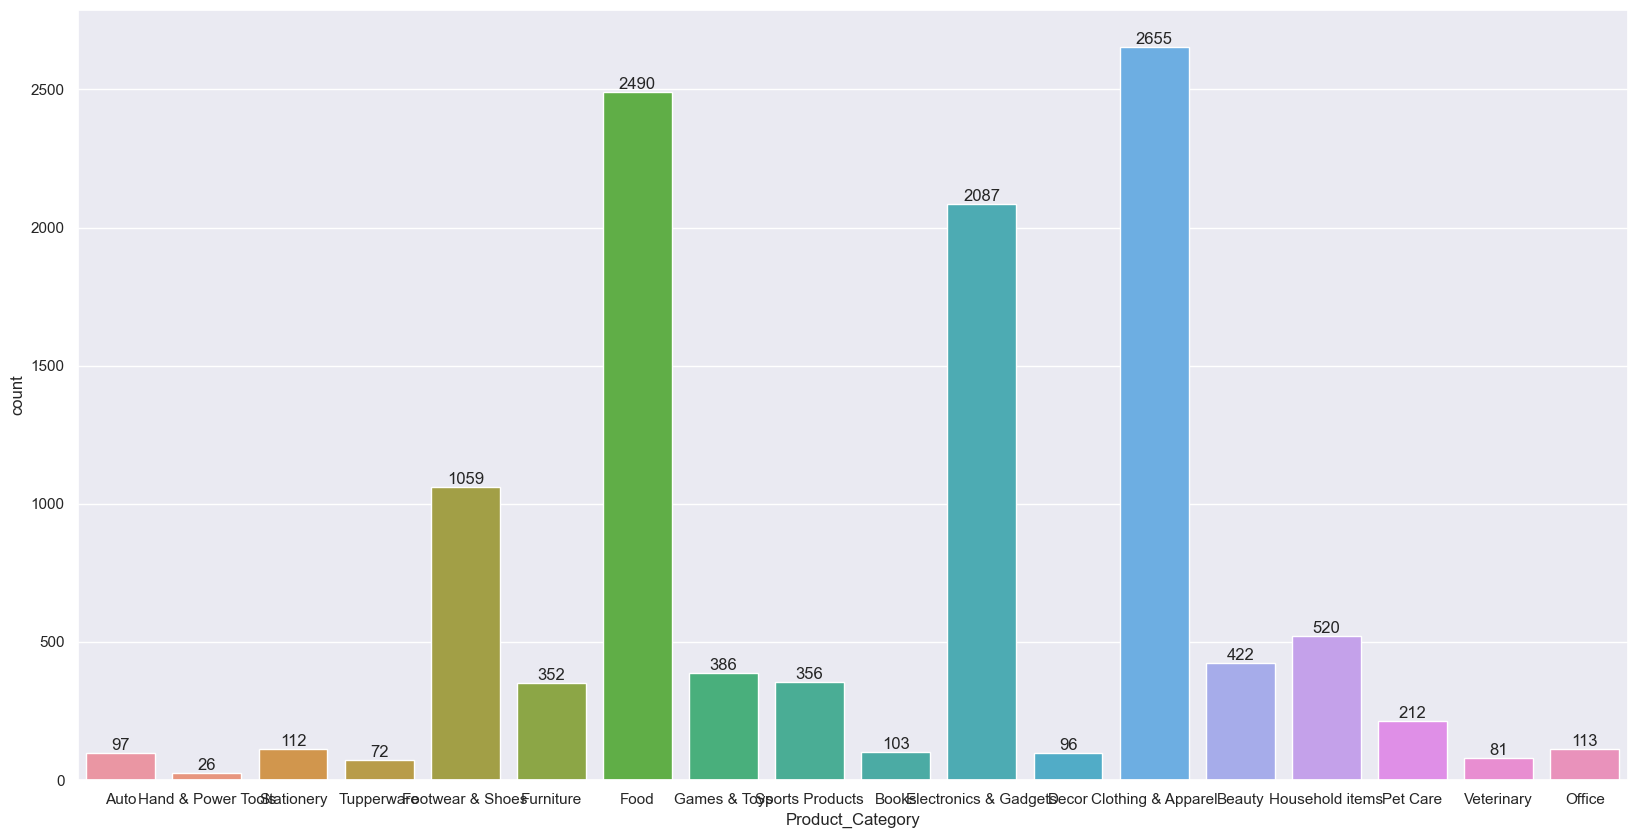

In [33]:
ax=sns.countplot(data=data,x='Product_Category')
sns.set(rc={'figure.figsize':(25,20)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

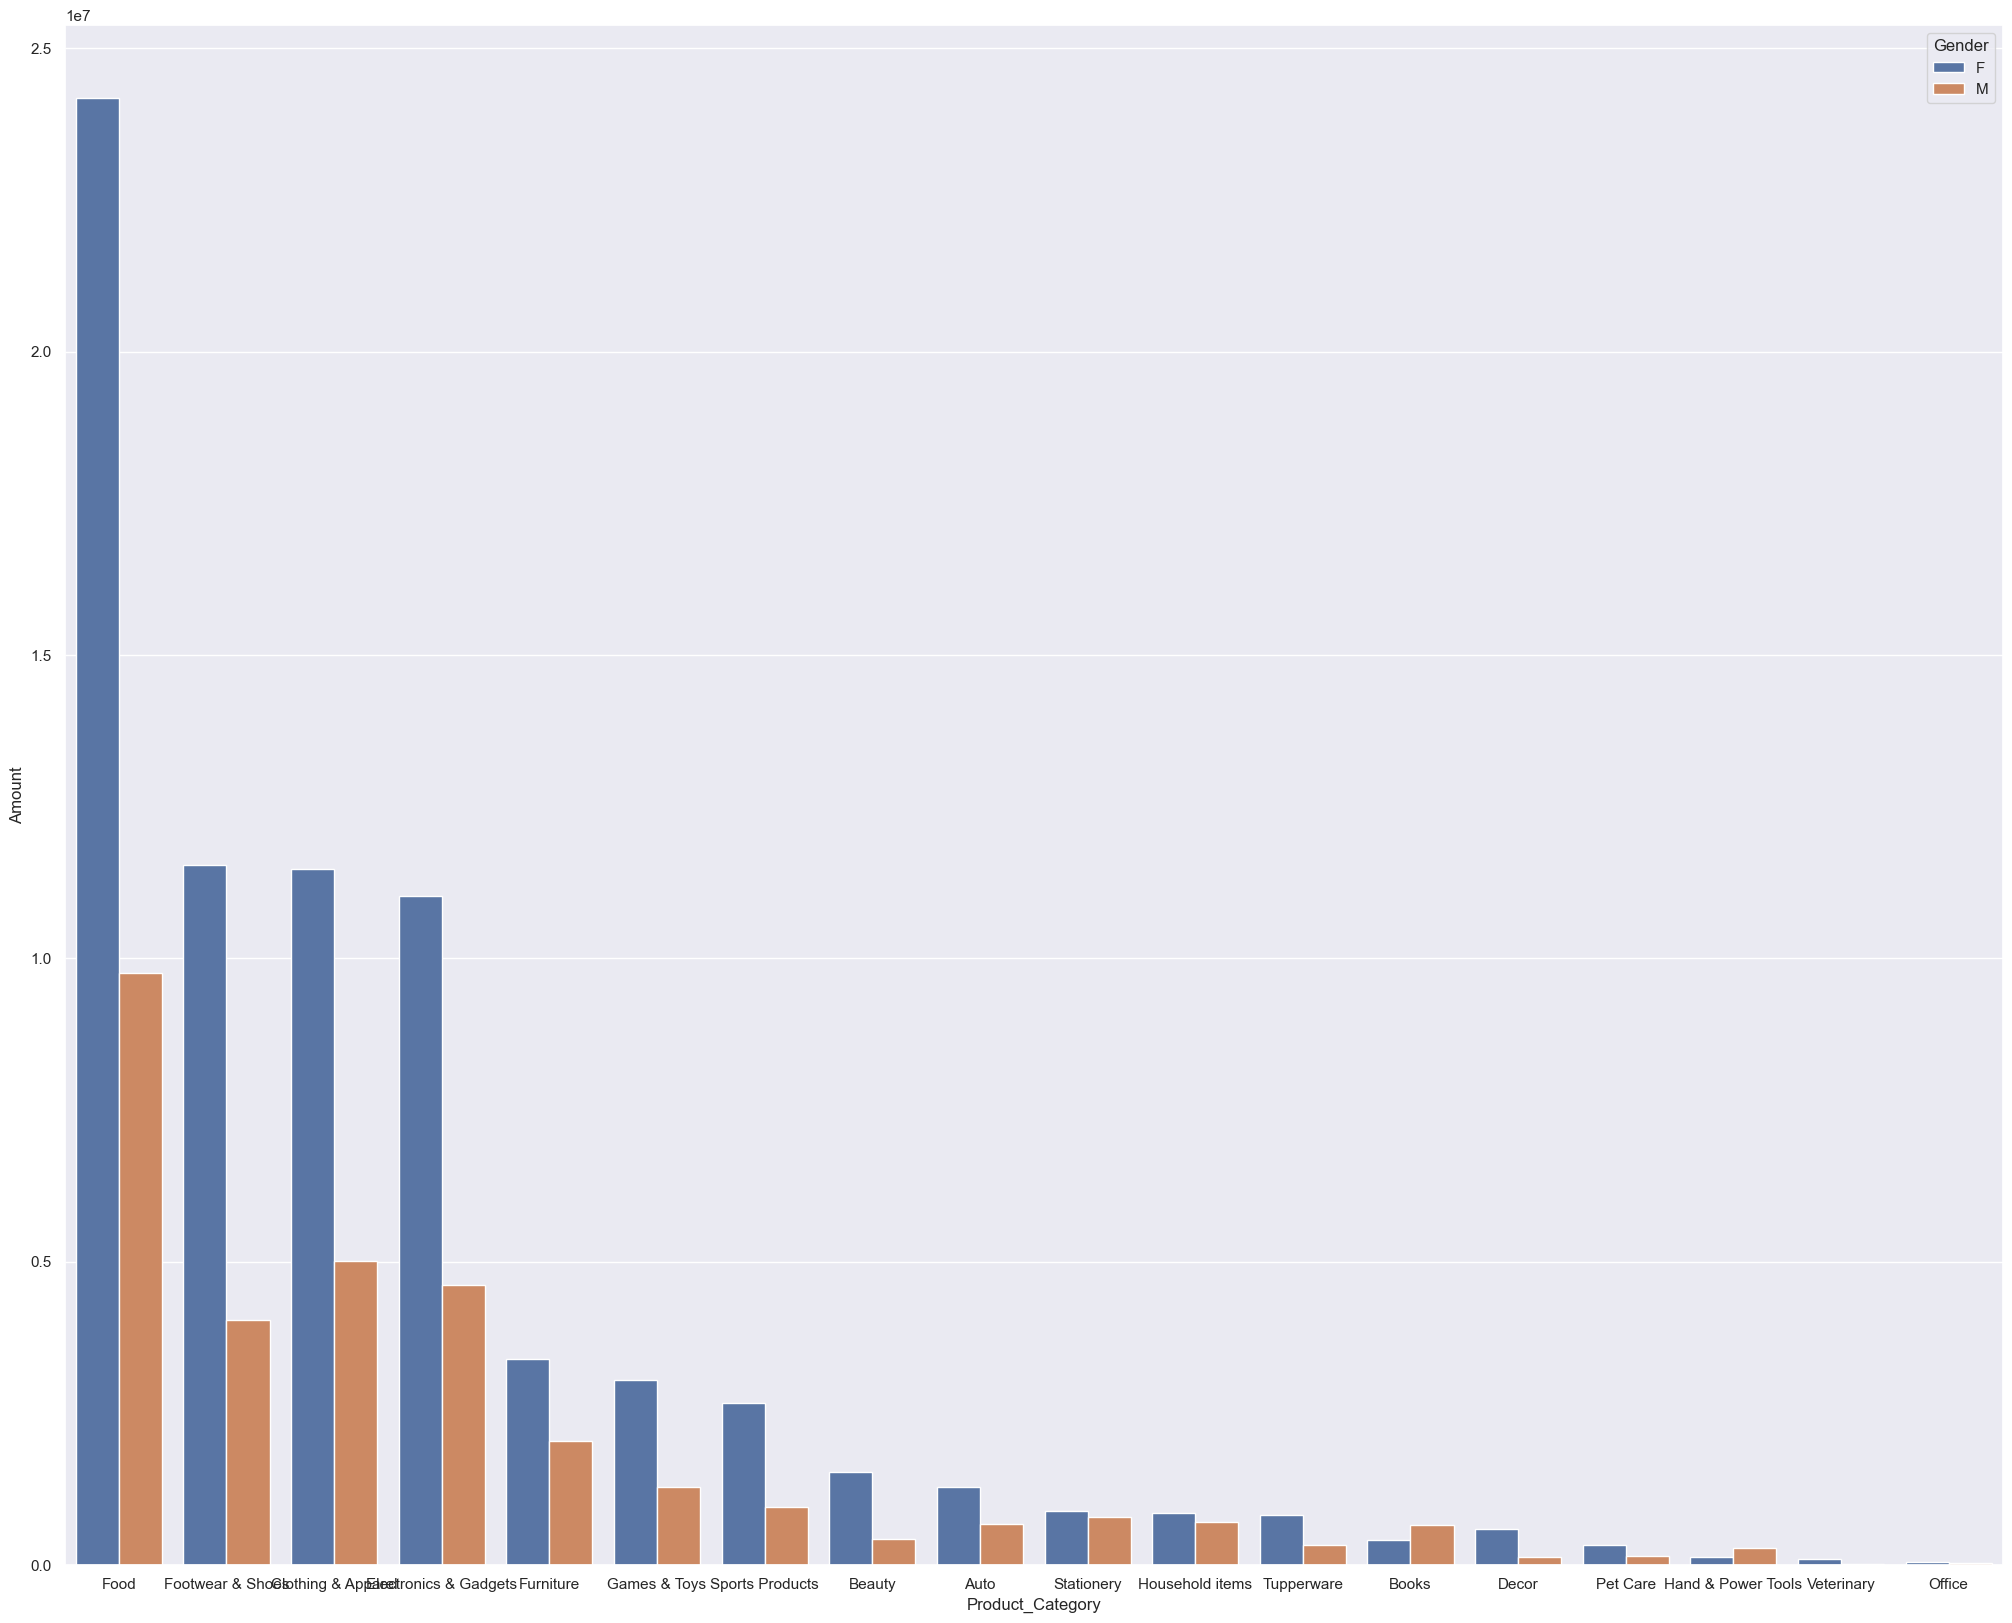

In [39]:
prd=data.groupby(['Product_Category','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(25,20)})
sns.barplot(data=prd,x='Product_Category',y='Amount',hue='Gender')

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category by FEMALES.

<Axes: xlabel='Product_ID', ylabel='Orders'>

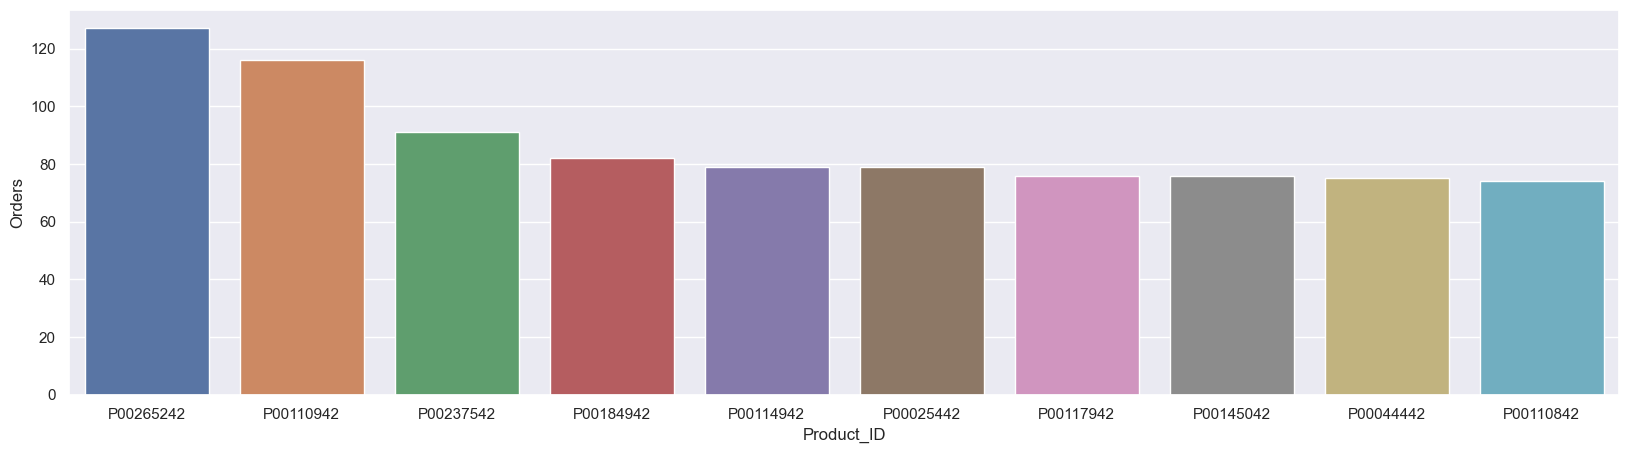

In [35]:
sales_state = data.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

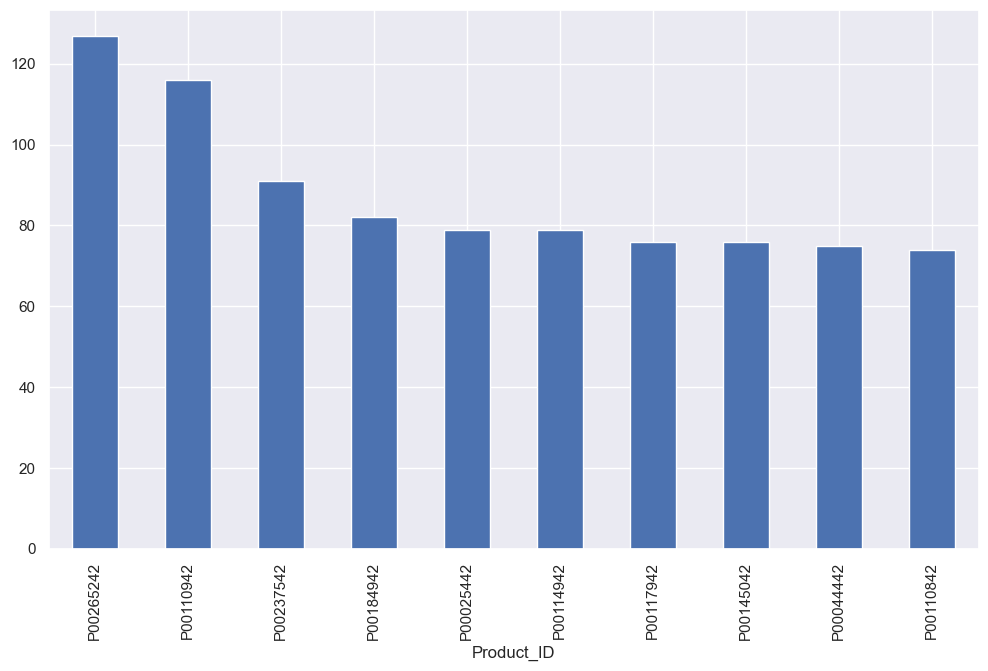

In [36]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
data.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# Conclusion

*Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.*